# Naive Bayes Classifier

### Table of Contents

1. [Data Description](#dd)
2. [Loading the packages and dataset](#load)
3. [Text preprocessing](#preprocessing)
     - 3.1 [Text Cleaning](#clean)
     - 3.2 [Applying TF-IDF](#apply)
4. [Separating label and features](#label)
5. [Train Test Split](#train)
6. [Building the Naive Bayes Model](#nb)
7. [Fitting the model](#fitting)
8. [Predictions from the model](#pred)
9. [Find the probability of assigning a SMS to a specific class](#find)

### 1. Data Description  <a id='dd'>

The dataset is a collection of 5574 SMS messages and the have been classified as Spam messages or Ham(not Spam).
We will use NLP to represent the text in the SMS into numbers and perform a classification using Naive Bayes classifier.

** Objectives **

1.  Convert the words ham and spam to a binary indicator variable(0/1)

2.  Convert the txt to a sparse matrix of TFIDF vectors

3.  Fit a Naive Bayes Classifier

4.  Measure your success using roc_auc_score


### 2. Loading packages and dataset   <a id='load'>

In [1]:
# Loading the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# Loading the dataset

df= pd.read_csv(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\Naive Bayes\attachment_sms_spam_lyst3307.csv")

In [4]:
df.shape

(5574, 2)

There are 5574 rows and only 2 columns

In [5]:
# Observe the first 5 rows

df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Convert the spam and ham to 1 and 0 values respectively for probability testing

In [6]:
df.type.replace('spam', 1, inplace=True)
df.type.replace('ham', 0, inplace=True)

In [7]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 3. Text Preprocessing   <a id='preprocessing'>

 Here a document is of SMS, and the corpus is all the SMS collection.

### 3.1 Text Cleaning   <a id='clean'>

In [8]:
N = 5574                                                  # Number of messages
corpus = []

In [9]:
import re                                              # For text preprocessing we use nltk                    
from nltk.corpus import stopwords                         # Removing all the stopwords
from nltk.stem.porter import PorterStemmer                # Reducing words to base form

Stopwords: Words which are filtered before applying NLP as they have no meaning.<br>
E.g. a, again, am, are, but, etc....

Porter Stemmer is used to remove any morphological affixes from words, leaving only the word stem.<br>
E.g. running --> run <br>
having --> have

In [10]:
ps = PorterStemmer()

for i in range(0, 5574):
    sms = re.sub('[^a-zA-Z]', ' ', df['text'][i])         # Removing special symbols like ... ! and keeping only text
    sms = sms.lower()                                     # Lower case
    sms = sms.split()                                     # string split into words
    sms = [ps.stem(word) for word in sms                  # reducing words to base form
          if not word in set(stopwords.words('english'))]
    sms = " ".join(sms)
    corpus.append(sms)                                 

In [11]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

### 3.2 Applying TF-IDF    <a id='apply'>

Tf-idf is an NLP technique to weight words how important they are. <br>
How do we calculate the importance of words?  <br>

Words that are used frequently in many documents will have a lower weighting while infrequent ones will have a higher weighting. 

The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

We calculate the term frequency and inverse document frequency by the following formula <br>
    
**Term Frequency: TF(t)** = (Number of times term t appears in a document) / (Total number of terms in the document)
 
**Inverse Document Frequency: IDF(t)** = log_e(Total number of documents / Number of documents with term t in it).

**tf-idf score**=TF(t)*IDF(t)
 

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [20]:
from wordcloud import WordCloud, STOPWORDS

word_string=" ".join(corpus)
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300
                         ).generate(word_string)

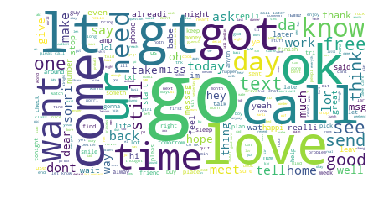

In [21]:
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observation** :

Most common words are go, call, love and ok

In [22]:
#TFIDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')

### 4. Separating labels and features   <a id='label'>

In [23]:
##Our dependent variable will be 'spam' or 'ham' 
y = df.type

In [24]:
#Convert df.text from text to features

X = vectorizer.fit_transform(corpus)

In [25]:
X.shape

(5574, 6296)

In [26]:
X

<5574x6296 sparse matrix of type '<class 'numpy.float64'>'
	with 45127 stored elements in Compressed Sparse Row format>

**Exploring the First SMS**

In [27]:
# Spliting the SMS to separate the text into individual words

splt_txt1 = corpus[0].split()
print(splt_txt1)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']


In [28]:
# Finding the most frequent word appearing in the SMS
max(splt_txt1)

'world'

In [29]:
# Count the number of words in the first SMS
len(splt_txt1)

16

In [30]:
X[0]

<1x6296 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

**It means in the first SMS there are 16 words & out of which only 14 elements have been taken after tf-idf, that is why we will get only 14 tf-idf values for the first the SMS. Likewise elements or words of all other SMSes are taken into consideration**

In [32]:
# Looking at the tf-idf values of SMS 1
X[0].data

array([0.14067037, 0.35229072, 0.24055604, 0.27282811, 0.26350554,
       0.29761882, 0.19461192, 0.23616959, 0.28505982, 0.33630022,
       0.29761882, 0.16499165, 0.35229072, 0.19461192])

** Looking at all the values of X we can observe ** <br>
0 is the first SMS. This goes all the way to 5573 SMS. <br>
5957, 190 etc are the positions of the elements or the words <br>
0.14, 0.35, 0.24 are the tf_idf value of the words <br> 
Like wise we can find the next SMSes & the tf-idf value of the words of the SMSes

In [33]:
print(X)

  (0, 2171)	0.14067036664337382
  (0, 2827)	0.35229072318210347
  (0, 4091)	0.24055604223291524
  (0, 1169)	0.2728281064271195
  (0, 379)	0.26350553820175565
  (0, 738)	0.29761882264685163
  (0, 2245)	0.194611923345502
  (0, 6135)	0.2361695879341298
  (0, 2932)	0.2850598227684076
  (0, 736)	0.3363002173539638
  (0, 964)	0.29761882264685163
  (0, 2208)	0.16499165213970052
  (0, 190)	0.35229072318210347
  (0, 5957)	0.194611923345502
  (1, 3760)	0.2809416954541812
  (1, 2960)	0.42190021648154313
  (1, 2794)	0.4745431066842695
  (1, 6056)	0.4459772022866927
  (1, 3785)	0.5647876999609088
  (2, 2007)	0.12883260823783457
  (2, 1673)	0.398353552342864
  (2, 6101)	0.21369506062697
  (2, 1058)	0.21811540682118313
  (2, 6067)	0.16011370513953382
  (2, 1791)	0.5268203212451349
  :	:
  (5569, 3365)	0.2780330172728527
  (5569, 1573)	0.30079088213290217
  (5570, 2171)	0.29598799903088946
  (5570, 2457)	0.3745825198279203
  (5570, 1996)	0.5740643692603435
  (5570, 1704)	0.66522863754861
  (5571, 5236

In [35]:
# 3000 is the position of the word 'lect'
vectorizer.get_feature_names()[3000] 

'lect'

In [36]:
# The most frequent word across all the SMSes
max(vectorizer.get_feature_names())

'zyada'

In [37]:
y.shape, X.shape

((5574,), (5574, 6296))

### 5. Train Test Split   <a id='train'>

In [38]:
# Split the test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=76)

### 6. Building the Naive Bayes Model   <a id='nb'>

In [40]:
# Train Naive Bayes Classifier
# Fast (One pass)
# Not affected by sparse data, so most of the 6296 words dont occur in a single observation
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()

### 7. Fitting the model   <a id='fitting'>

In [41]:
model=clf.fit(X_train, y_train)

### 8. Predictions from the model   <a id='pred'>

In [42]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


**First 3 SMSes are correctly assigned to Ham(0) based on the tf-idf scores of the words given in the SMSes**

In [43]:
print(y_test[0:3])

4700    0
3095    0
4090    0
Name: type, dtype: int64


In [46]:
df.loc[[4700]]

,type,text
4700,0,Yes fine


In [47]:
df.loc[[3095]]

,type,text
3095,0,Have you emigrated or something? Ok maybe 5.30...


In [48]:
df.loc[[4090]]

,type,text
4090,0,"How are you, my Love ? Are you with your broth..."


**We observed that our first 3 predictions are correct**

### 9. Find the probability of assigning a SMS to a specific class   <a id='find'>

In [49]:
prd=model.predict_proba(X_test)

In [50]:
prd

array([[0.98434851, 0.01565149],
       [0.99393388, 0.00606612],
       [0.99128324, 0.00871676],
       ...,
       [0.94948275, 0.05051725],
       [0.18093445, 0.81906555],
       [0.94741333, 0.05258667]])

In [51]:
clf.predict_proba(X_test)[:,1]

array([0.01565149, 0.00606612, 0.00871676, ..., 0.05051725, 0.81906555,
       0.05258667])

In [52]:
#Check model's accuracy
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9870806171384207

### With the model, the success rate is ~98.70%